In [50]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
buy-and-hold strategy return and risk: 9.27% and 19.74%
support and resistance strategy return and risk: 16.73% and 12.05%


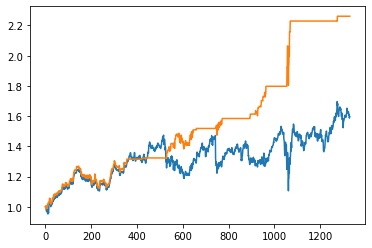

In [54]:
#downloading stock data
stock = 'JNJ'
data = yf.download(stock, '2016-01-01', '2021-04-16')
#specifying strategy parameters
fee = 0.0005
sr_sell = 0.7
sr_buy = 0.3
#coding technical analysis signals
data['returns'] = data['Close'].pct_change()
data['scaled price'] = data['Close']/10**np.floor(np.log10(data['Close']))
data['S&R'] = data['scaled price']%1
#simulating trading strategies
data['signal'] = 1*(data['S&R'] < sr_buy) - 1*(data['S&R'] > sr_sell)
BnH_return = np.array(data['returns'][1:])
SR_return = np.array(data['returns'][1:])*np.array(data['signal'][:-1]) - fee*abs(np.array(data['signal'][1:])-np.array(data['signal'][:-1]))
BnH = np.prod(1+BnH_return)**(252/len(BnH_return)) - 1
SR = np.prod(1+SR_return)**(252/len(SR_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
SR_risk = np.std(SR_return)*(252)**(1/2)
#visualising the results
print('buy-and-hold strategy return and risk: '+str(round(BnH*100,2))+'% and '+str(round(BnH_risk*100,2))+'%')
print('support and resistance strategy return and risk: '+str(round(SR*100,2))+'% and '+str(round(SR_risk*100,2))+'%')
plt.plot(np.append(1,np.cumprod(1+BnH_return)))
plt.plot(np.append(1,np.cumprod(1+SR_return)))